<a href="https://colab.research.google.com/github/Dih08/projetos-simples-e-aleatorios/blob/main/TestesAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
lift = 1.1
test = np.random.binomial(100, p=0.2 * lift, size=10000)
ctrl = np.random.binomial(100, p=0.2, size=10000)

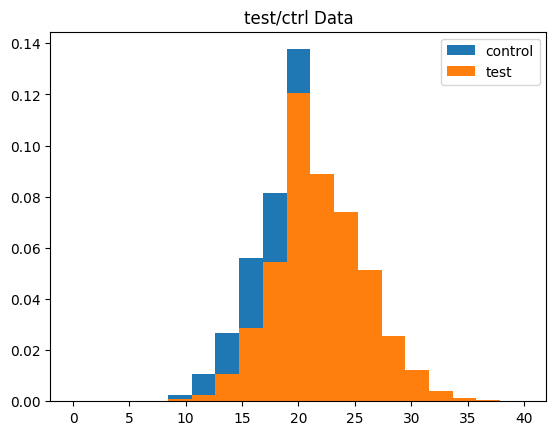

In [5]:
bins = np.linspace(0, 40, 20)

plt.hist(ctrl, bins=bins, label='control', density=True)
plt.hist(test, bins=bins, label='test',density= True)
plt.title('test/ctrl Data')
plt.legend()

In [6]:
from scipy import stats
print('teste: {0}', format(stats.describe(test)))
print('control: {0}', format(stats.describe(ctrl)))

teste: {0} DescribeResult(nobs=10000, minmax=(9, 38), mean=21.993, variance=17.079058905890587, skewness=0.12257351275326436, kurtosis=-0.05991842895190613)
control: {0} DescribeResult(nobs=10000, minmax=(8, 35), mean=19.8736, variance=15.605183558355835, skewness=0.12456433632241995, kurtosis=-0.08857879716716743)


In [7]:
def boostrapper(A_vec, B_vec, sample_size, resample):
  A_avg_vec = A_vec[(np.random.rand(resample,sample_size)*len(A_vec)).astype(int)].mean(axis=1)
  B_avg_vec = B_vec[(np.random.rand(resample,sample_size)*len(B_vec)).astype(int)].mean(axis=1)
  return A_avg_vec, B_avg_vec

In [8]:
A_avg_vec, B_avg_vec = boostrapper(test, ctrl, 100, 10000)


Distribuição a posterior aproximada dos parametros!

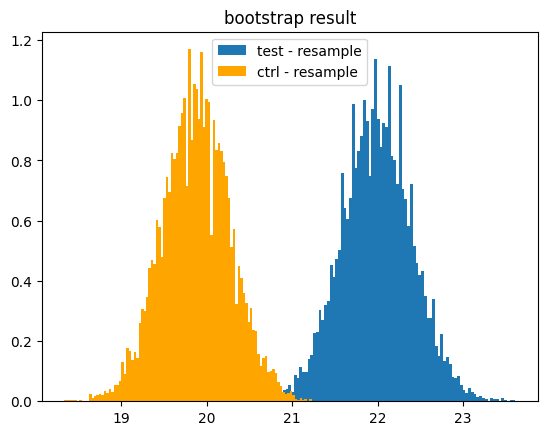

In [9]:
bins = 100
plt.hist(A_avg_vec, bins=bins, label='test - resample', density=True)
plt.hist(B_avg_vec, bins=bins, label='ctrl - resample',color='orange' ,density=True)
plt.title('bootstrap result')
plt.legend()

In [10]:
print('test: {0}', format(stats.describe(A_avg_vec)))
print('ctrl: {0}', format(stats.describe(B_avg_vec)))

test: {0} DescribeResult(nobs=10000, minmax=(20.37, 23.61), mean=21.992310999999997, variance=0.1689231415931593, skewness=0.042082676077383606, kurtosis=0.0593998272277112)
ctrl: {0} DescribeResult(nobs=10000, minmax=(18.33, 21.23), mean=19.874257999999998, variance=0.15874934437043703, skewness=-0.006714163184937709, kurtosis=0.01331374457861978)


Realizando teste após o bootstrap

In [11]:
from scipy import stats
stats.ttest_ind(A_avg_vec, B_avg_vec)

TtestResult(statistic=370.0128742813888, pvalue=0.0, df=19998.0)

Agora com dados assimétricos

In [14]:
lift = 1.3
test = np.random.gamma(shape = 5 *lift,scale = 1/4, size=10000)
ctrl = np.random.gamma(shape = 5,scale = 1/4, size=50000)

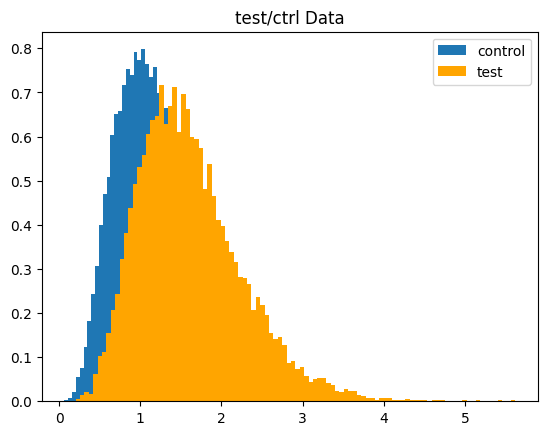

In [16]:
bins = 100
plt.hist(ctrl, bins=bins, label='control', density=True)
plt.hist(test, bins=bins, label='test',color='orange', density= True)
plt.title('test/ctrl Data')
plt.legend()

In [17]:
from scipy import stats
print('teste: {0}', format(stats.describe(test)))
print('control: {0}', format(stats.describe(ctrl)))

teste: {0} DescribeResult(nobs=10000, minmax=(0.20427168337960955, 5.616850396738152), mean=1.6182647126446945, variance=0.4128408676801743, skewness=0.8630649361769833, kurtosis=1.1960933821426094)
control: {0} DescribeResult(nobs=50000, minmax=(0.06433594499005751, 4.805134088396892), mean=1.248768214820572, variance=0.3141928225640419, skewness=0.9190711115997566, kurtosis=1.2778335777391803)


In [18]:
def boostrapper(A_vec, B_vec, sample_size, resample):
  A_avg_vec = A_vec[(np.random.rand(resample,sample_size)*len(A_vec)).astype(int)].mean(axis=1)
  B_avg_vec = B_vec[(np.random.rand(resample,sample_size)*len(B_vec)).astype(int)].mean(axis=1)
  return A_avg_vec, B_avg_vec

In [20]:
A_avg_vec, B_avg_vec = boostrapper(test, ctrl, 100, 500)

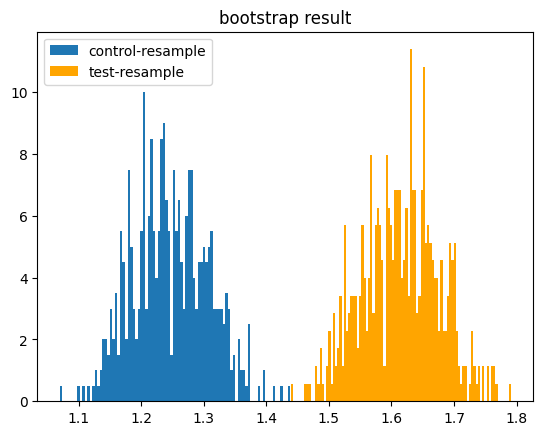

In [22]:
bins = 100

plt.hist(B_avg_vec, bins=bins, label='control-resample', density=True)
plt.hist(A_avg_vec, bins=bins, label='test-resample',color='orange', density= True)
plt.title('bootstrap result')
plt.legend()

In [23]:
sum(A_avg_vec - B_avg_vec > 0) / len(A_avg_vec)

1.0

In [24]:
from scipy import stats
stats.ttest_ind(A_avg_vec, B_avg_vec)

TtestResult(statistic=94.70198838738284, pvalue=0.0, df=998.0)